In [1]:
# My GitHubRepo - https://github.com/RohitDhankar
# Kaggle Profile - https://www.kaggle.com/rohitdhankar

# Python 3.5 Notebook to be uploaded to Kaggle - Python 3.5 virtual env activated - usually work with 2.7 
#
#conda create -n py35 python=3.5 ipykernel
#source activate py35
#
# conda create -n py27 python=2.7 ipykernel
# source activate py27


# STEP -1
### Feature Reduction - defined as Reducing Number of Features ,utilized for Classification. 
 Before we proceed with Classification - we "may need" - Feature Reduction. Feature reduction is also known as Dimensionality Reduction. 
 WIKI - https://en.wikipedia.org/wiki/Dimensionality_reduction


### Factor Analysis - Factor Analysis is in ceratin litterature quoted as a Feature Reduction technique , but its NOT to be considered so . 
  Quoting Prof Mitra IIT Kanpur - Source - http://textofvideo.nptel.iitm.ac.in/111104024/lec38.pdf
   "FA explains the covariance structure or the  variance  covariance  structure, of  a  random  vector in terms  of  a  few  underlying  unobservable  factors." 

 According to Wiki quoted below - Exploratory Factor Analysis is the better option - compared to PCA 

###   " Clearly though, PCA is a more basic version of exploratory factor analysis (EFA) that was developed in the early days prior to the advent of high-speed computers. From the point of view of exploratory analysis, the eigenvalues of PCA are inflated component loadings, i.e., contaminated with error variance"

 Source --- https://en.wikipedia.org/wiki/Factor_analysis
 EFA , FA - Not done yet for this Data Set as i dont think there is a need for the same . PCA done that too may not turn out to be effective or desired. 


# STEP -3
### Principal Component Analysis - PCA 
 PCA is usually not done for a Data Set if most Features are Categorical.  Thus i dont see a need for a PCA here but we shall still do a PCA and see how the predictions are in comparison to a Non PCA RAW DATA set. 
 
 Source :-  http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
 When a PCA is undertaken:- 
 - We dont include RESPONSE variable - Attrited Employees == "left".
 - Cant include any other Binomial Or Categorical Variables.
 - Categorical to be included only when we use "advanced methods" for PCA.
 - Advanced methods for PCA :- http://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/14013#14013
 - Advanced methods out of scope for now.ToBeDone - Try with "advanced methods" including Categorical Variables. 


# STEP -4
### Pre Processing Data 
### Standardize Variables :- 
   - "Democracy amongst Variables" lets ensure All features have- Mean =0 and Variance =1 

### Multiple options for SCALING and STANDARDIZATION with scikitlearn 
- Option -1 sklearn.preprocessing.scale - Not Done. Type= Function.
- Option -2 sklearn.preprocessing.StandardScaler -Done. Type= Utility Class. 
- Option -3 MinMax Scaler -Not Required with this DataSet.

## Dataset Train & Test Split -- k Fold CrossValidation with StartShuffleSplit - Done 

# STEP -5 
### Choosing Classifiers :- 

- Logistic Regression 
- kNN - k Nearest Neighbour
- Naive Bayes - Done but rejected - as not a good choice for this Dataset. 
- Neural Network [MLP] Multi Layer Perceptron - TBD 
- Support Vector Machine - TBD 
- Decision Tree - TBD 
- Random Forests - TBD 
- XGBoost - TBD 
- TPOT and other "Related Projects" -- http://scikit-learn.org/stable/related_projects.html#related-projects
- Pipeline the Classifiers - discover other options to auto-mate with Pipeline 
- Keras , TensorFlow , Theano - what else have you ? 


# STEP -6
### Model Evaluation
 Need to ensure CLASSIFICATION ACCURACY displayed by Model on any Test data set
 is greater than - Ratio of Classes in Sample or Population  [All Train + All Test sets] 

# STEP -7 - TBD 
 Advanced Data Visualization 
 Plot AUC and ROC Curves etc -[ToBeDone Later]-- look at own code from RStats and earlier Py27 Notebooks.  

# STEP -8
 Look at Excel worksheets and R Parallels for this Project - using same Sample Data Set. Compare Performance as per Accuracy and Time etc. 

# STEP 9 
 Further investigation - Survival Analysis :- predicting when an employee is most likely to Churn or Exit. 



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) # On Kaggle 
print(check_output(["ls", "/home/dhankar/spark-2.0.2-bin-hadoop2.7/DHANK/__Kaggle"]).decode("utf8")) # Offline 

# /home/dhankar/spark-2.0.2-bin-hadoop2.7/DHANK/__Kaggle
# https://docs.python.org/3.5/library/subprocess.html#subprocess.check_output

# Any results you write to the current directory are saved as output.

Decision_Tree_HR_Analytics.ipynb
dfh1_Test.csv
dfh_Test.csv
HrA_3.dot
HR_Analytics_IBM_WATSON_SampleDataSet_7.ipynb
HR_comma_sep.csv
Kaggle_Copy_HR_Analytics_IBM_WATSON_SampleDataSet_7.ipynb
Kaggle_HRAnalyticsData_Py35.ipynb
Kaggle_HRAnalyticsData_Py35_v2.ipynb
Kaggle_HRAnalyticsData_Py35_v3.ipynb
Kaggle_TEST_HRA.csv
Py35_Activate.txt
R_Scrpts
Screen_Shots
Untitled.ipynb



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
%matplotlib inline

/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
mymap = {'accounting':1,'hr':2,'IT':3, 'management': 4 ,'marketing':3, 'product_mng' :5 , 
         'RandD':6,'sales':7,'support':8,'technical':9,}

#
dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh.head(5)

# TBD- LabelEncoder - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html
# http://pandas.pydata.org/pandas-docs/stable/indexing.html

#dfh.to_csv('dfh_Test.csv') # Ok for down csv 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [6]:
mymap = {'low':1,'medium':2,'high':3}
#
dfh1 =dfh.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh1.head(5)
#
#dfh1.to_csv('dfh1_Test.csv') # Ok for down csv 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [7]:
dfh2 = dfh1.drop(df.columns[[6]],axis=1,inplace=False) # Drop the Target Feature
print(dfh2.head(5))
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*dfh2.shape))
names = dfh2.columns.values
print ("_"*90)
print (names)
dfh3 = pd.DataFrame(dfh1["left"]) #  Interim DF only -Target Feature
names1 = dfh3.columns.values
print ("_"*90)
print (names1)
print ("_"*90)
print('Number of rows: {}, Number of columns: {}'.format(*dfh3.shape))
print ("_"*90)
print (dfh3["left"].value_counts()) # Here - 0 == Live Employee [11428] , 1 == Exited Employee / Attrited Employee[3571]
#


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  sales  salary  
0                   3              0                      0      7       1  
1                   6              0                      0      7       2  
2                   4              0                      0      7       2  
3                   5              0                      0      7       1  
4                   3              0                      0      7       1  
_________________________________________________________

Target value min 0.000 max 1.000 mean 0.238 std 0.426


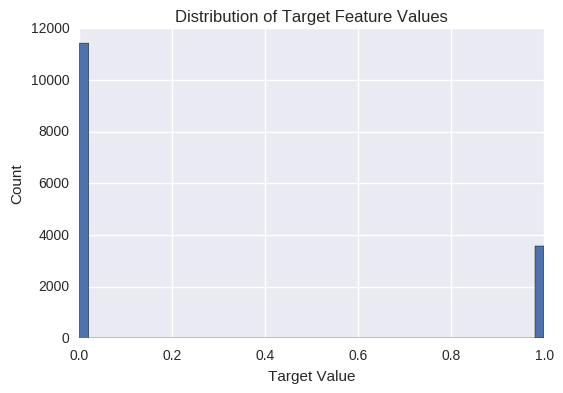

In [8]:
y = dfh3['left'].values
#plt.hist(y, bins=50, color=p[1])
plt.hist(y, bins=50)
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Feature Values')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

In [9]:
feature_labels = []
missing_values = []
feature_totals = []
feature_means = []
for col in dfh2.columns:
    feature_labels.append(col)
    missing_values.append(dfh2[col].isnull().sum()) # Check for missing Values if any ? 
    feature_totals.append(dfh2[col].sum())
    feature_means.append(dfh2[col].mean())
    print(col, missing_values[-1]) # Within loop prints out Col Labels and How Many Missing Values if any ..
    
print ("_"*60+"_________Out_of_Loop__")    
print('\n'.join('{}:{:06.2f}'.format(*k) for k in enumerate(feature_totals)))
# 
print ("_"*90)
print('\n'.join('{}:{:.2f}'.format(*k) for k in enumerate(feature_means)))

# Code Source - Stack Overflow :- 
# http://stackoverflow.com/questions/4440516/in-python-is-there-an-elegant-way-to-print-a-list-in-a-custom-format-without-ex
# http://stackoverflow.com/questions/2762058/format-all-elements-of-a-list
#
# Code Source - https://pyformat.info/:- 
# https://pyformat.info/

satisfaction_level 0
last_evaluation 0
number_project 0
average_montly_hours 0
time_spend_company 0
Work_accident 0
promotion_last_5years 0
sales 0
salary 0
_____________________________________________________________________Out_of_Loop__
0:9191.89
1:10740.81
2:57042.00
3:3015554.00
4:52470.00
5:2169.00
6:319.00
7:91544.00
8:23919.00
__________________________________________________________________________________________
0:0.61
1:0.72
2:3.80
3:201.05
4:3.50
5:0.14
6:0.02
7:6.10
8:1.59


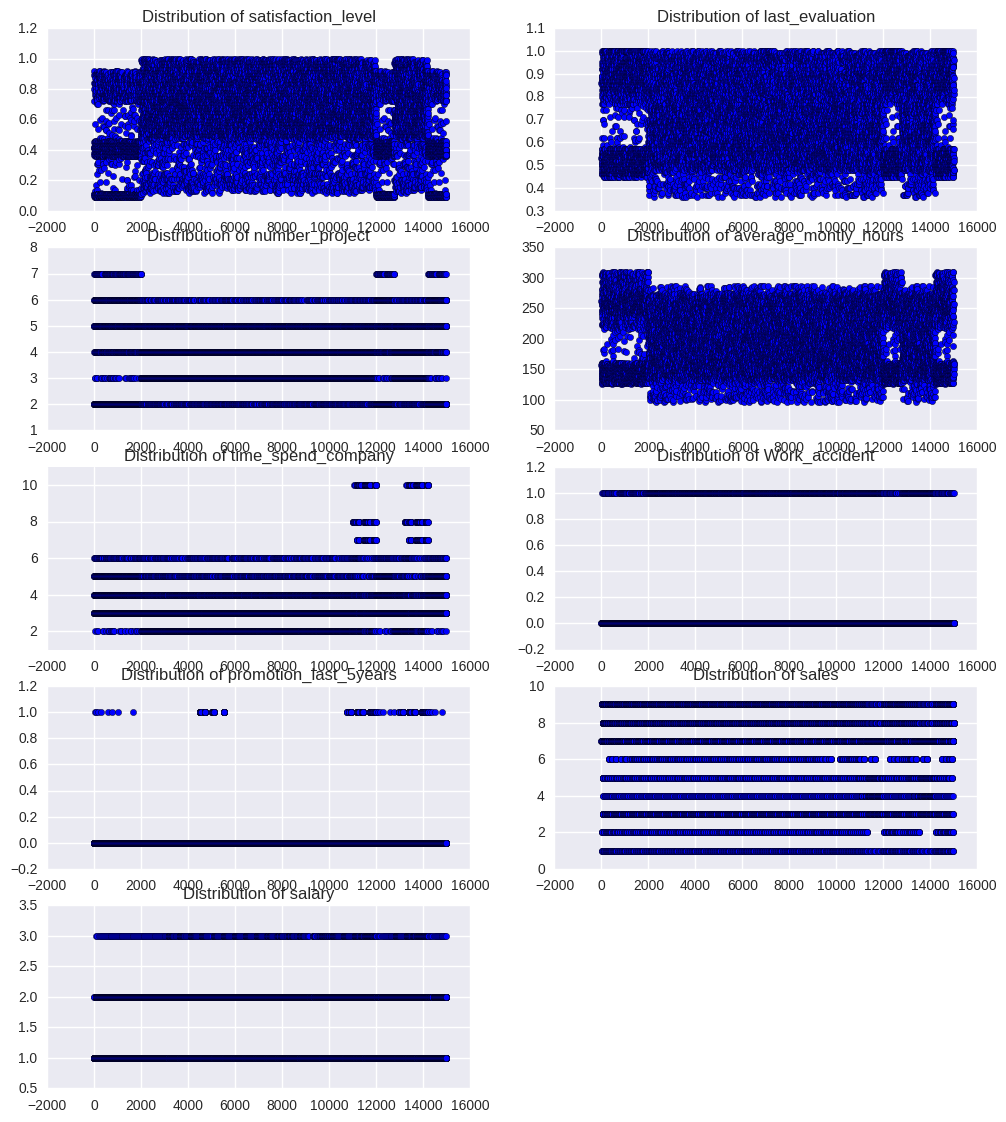

In [10]:
#Iterate within Features and Plot  

F_cols = [col for col in dfh2.columns]
fig = plt.figure(figsize=(12, 25))
plt_count = 0
for col in F_cols:
    plt_count += 1
    plt.subplot(9, 2, plt_count) # 9 as there are 8 features 
    plt.scatter(range(dfh2.shape[0]), dfh2[col].values)
    plt.title("Distribution of "+col)
plt.show()

# These below are inferences drawn on raw data set - 
# As of now there is No Split into Train or Test and also no Cross Validation 
# Such an inference would make more sense if there were "Dates of Joining" or some Employee ID's also provided for employees 
#
#
# Distinct pattern seen between sample 0 to 2000 for -- Features - Satisfaction Level , Last Eval , Avg Monthly Hours etc . 
# Feature  "time_spend_company" -- values == 7,8,10 present only in samples - 11000 to 15000  
# Feature  "promotion_last_5years" -- values == 1 [Promoted] NOT evenly distributed across samples.   
# Cant infer anything from Sales [Which is actually Departments] and Salary 
#

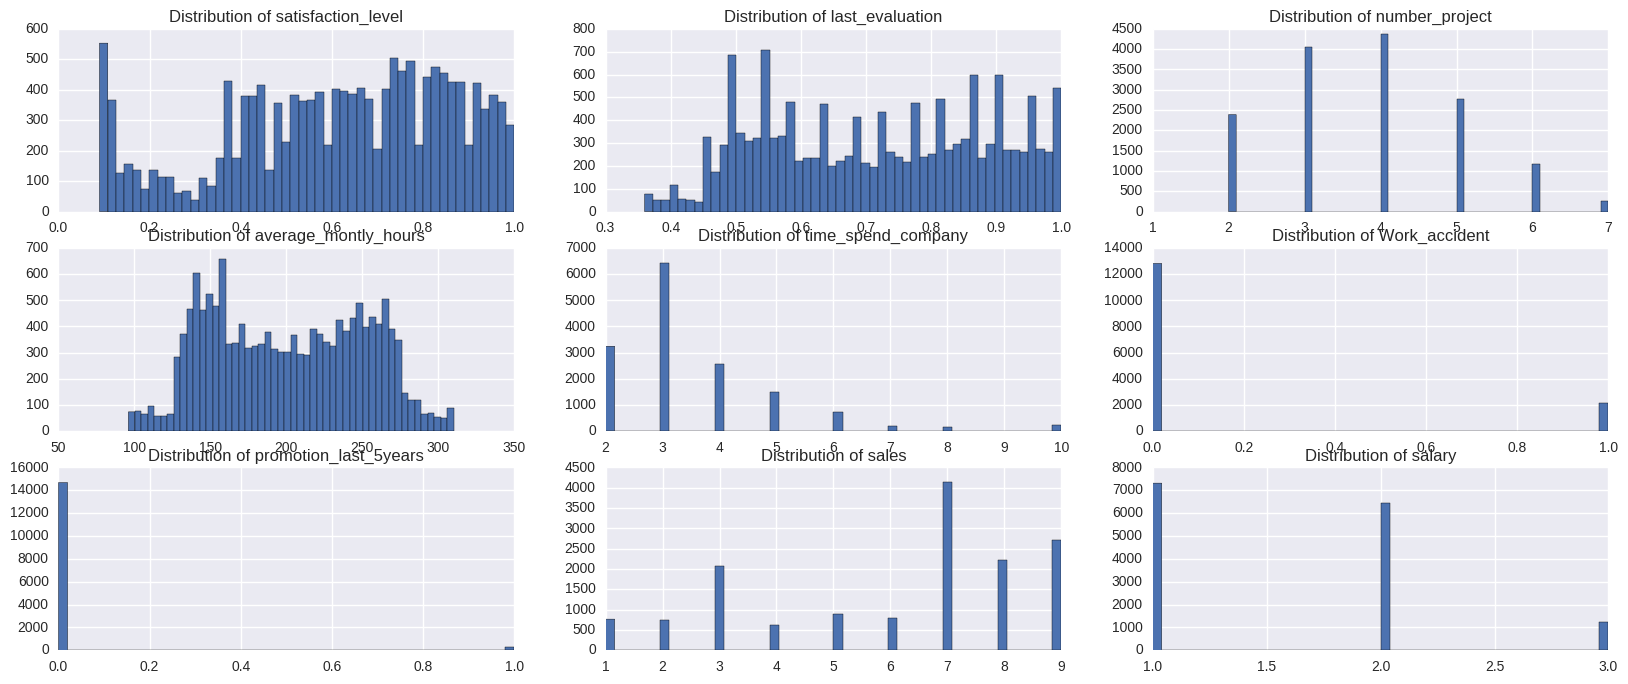

"\nTBD --- \n# Own --- \n#\nFeature_smaller_set = dfh2.last_evaluation.loc[dfh2.last_evaluation < 0.5].values\nfor bins in [100, 250]:\n    plt.figure(figsize=(15, 5))\n    plt.hist(Feature_smaller_set, bins=bins)\n    plt.xlabel('Timestamp')\n    plt.ylabel('Count')\n    plt.title('Histogram of Zoomed-in Last Eval - {} bins'.format(bins))\n\n\n\n"

In [11]:
# Exploratory Data Analysis - EDA 
#

F_cols = [col for col in dfh2.columns]
fig = plt.figure(figsize=(20, 25))
plt_count = 0
for col in F_cols:
    plt_count += 1
    plt.subplot(9, 3, plt_count) # 9 as there are 8 features 
    plt.hist(dfh2[col].values, 50)
    plt.title("Distribution of "+col)
plt.show()

'''
TBD --- 
# Own --- 
#
Feature_smaller_set = dfh2.last_evaluation.loc[dfh2.last_evaluation < 0.5].values
for bins in [100, 250]:
    plt.figure(figsize=(15, 5))
    plt.hist(Feature_smaller_set, bins=bins)
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title('Histogram of Zoomed-in Last Eval - {} bins'.format(bins))



'''

In [12]:
# Exploratory Data Analysis - EDA 
#
# Feature-last_evaluation
'''
Feature = dfh2.last_evaluation.values
for bins in [50, 100]:
    plt.figure(figsize=(10, 5))
    plt.hist(Feature, bins=bins)
    plt.xlabel('Feature-last_evaluation')
    plt.ylabel('Count')
    plt.title('Histogram last_evaluation - {} bins'.format(bins))
'''


"\nFeature = dfh2.last_evaluation.values\nfor bins in [50, 100]:\n    plt.figure(figsize=(10, 5))\n    plt.hist(Feature, bins=bins)\n    plt.xlabel('Feature-last_evaluation')\n    plt.ylabel('Count')\n    plt.title('Histogram last_evaluation - {} bins'.format(bins))\n"

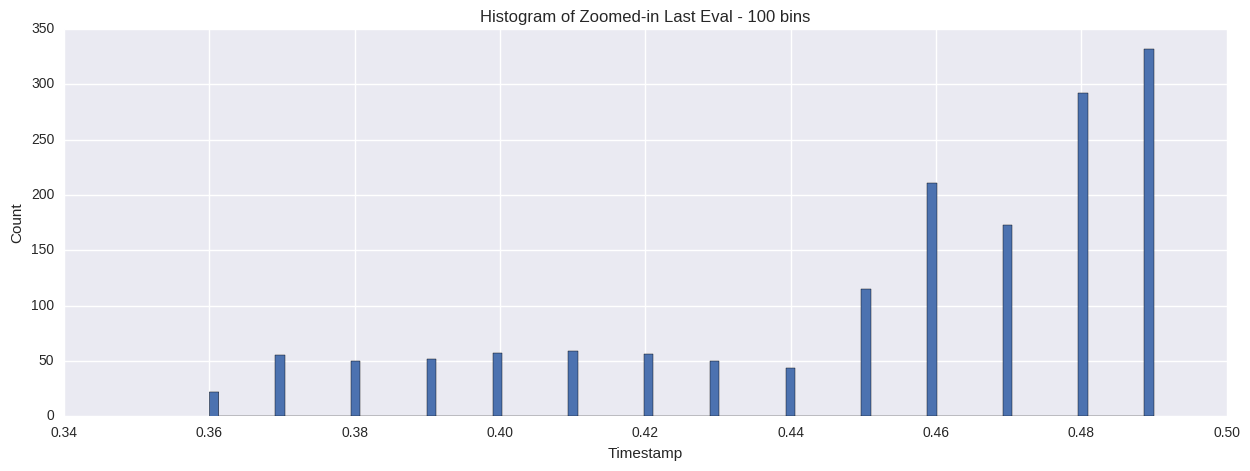

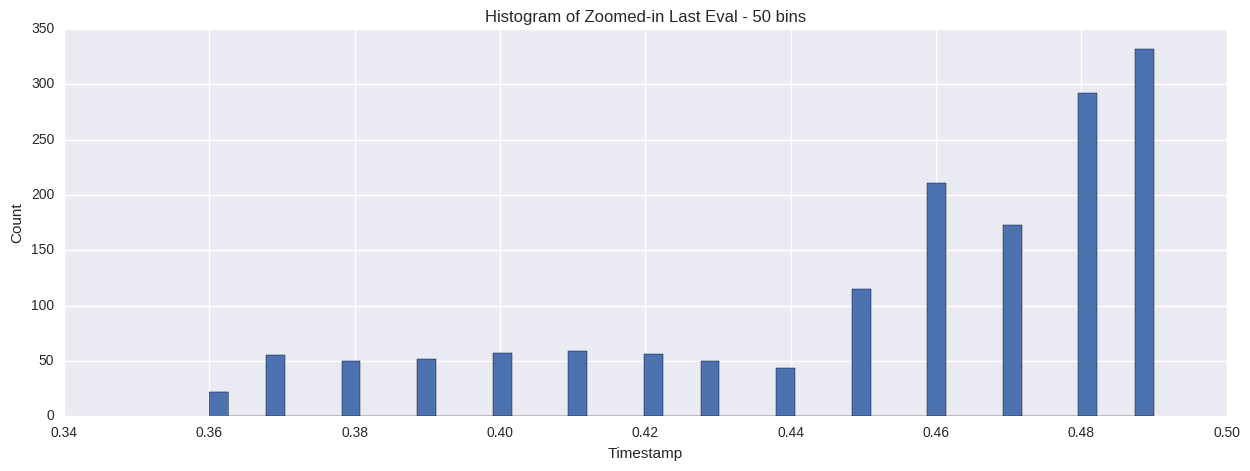

In [15]:
#TBD on KAggle -------27th DEC 


Feature_smaller_set = dfh2.last_evaluation.loc[dfh2.last_evaluation < 0.5].values
for bins in [100, 50]:
    plt.figure(figsize=(15, 5))
    plt.hist(Feature_smaller_set, bins=bins)
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title('Histogram of Zoomed-in Last Eval - {} bins'.format(bins))


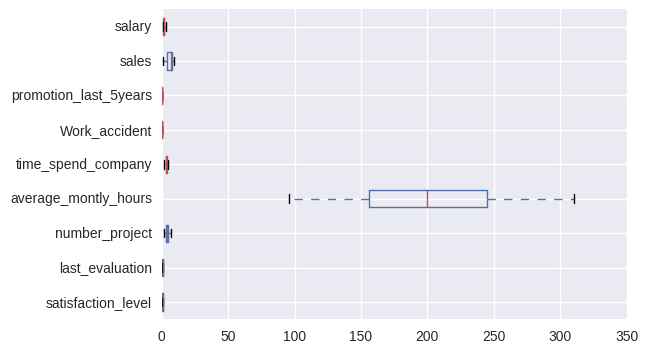

In [8]:
# Dataset boxplot for Means and Variances 
dfh2.plot(kind='box', vert=False)

# Seen below - Features have large Variance - data set needs std and scaling 

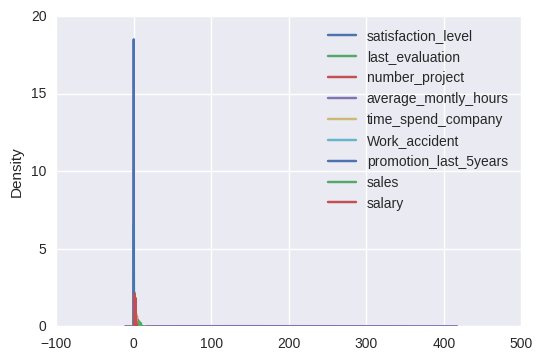

In [9]:
#  Density plot
dfh2.plot(kind='kde')
# No inference drawn as of now - To be Explored ..........??? 


--------------- CREATE A HEATMAP ---------------


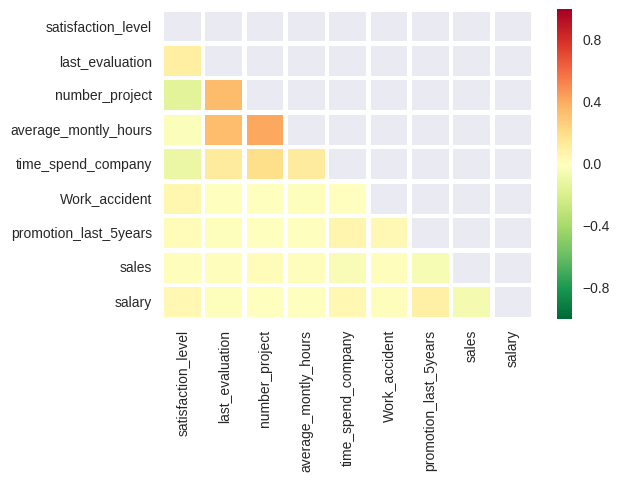

In [12]:
#Source -- http://www.tradinggeeks.net/2015/08/calculating-correlation-in-python/

print("--------------- CREATE A HEATMAP ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

# Inference from Corr Plot - 

- "Time_Spent_at_Company" - NEGATIVELY impacting - Satisfaction_Levels 
- "Last_Eval" - POSITIVELY Correlated with - "number_project" and "Average_Monthly_Hrs" seems higher performers get more work . 
- 

In [16]:
# Another Correlation from DFH2 Data 

corr_df = dfh2.corr(method='pearson')

print(corr_df.head(len(dfh2))) # Not required as we are plottng the Correlation above 

# We can look at Column 1 of the Print out below - see what all Features have a 
# greater than 0.1 Corr value - Negative or Positive both considered . 

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales                            0.010765         0.007920        0.022636   
salary                           0.050022        -0.013002       -0.001803   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project    

In [11]:
# Convert DF to Numpy Array 
# 1st Numpy Array == X , only Pred features 
# 2nd Numpy Array == y , only Target feature
import numpy as np

X = dfh2.iloc[:,0:9].values # All Features of - dfh2 besides "left"
y = dfh3.iloc[:,0].values # Choosing only - Target Feature -"left"
#
print(X.shape)
print(y.shape)
#
print ("_"*90)
print('Target Variable "left-Attrited":', (y))
print ("_"*90)
print('Class labels for Target Variable "left-Attrited":', np.unique(y))
print ("_"*90)
print('Percentage of Class Label ==1 = {:.4f}'.format(dfh3["left"].mean()))
print('Percentage of Class Label ==0 = {:.4f}'.format(1-dfh3["left"].mean()))
print ("_"*90)
print ("Model that Predicts 76.19% Accuracy is Non Predictor OR NO_Model- as it will always predict Dominant Class")
print ("This dataset Dominant Class = ZERO or LIVE EMPLOYEE - we need more than 76.19% Accuracy Score.")
print ("_"*90)

(14999, 9)
(14999,)
__________________________________________________________________________________________
Target Variable "left-Attrited": [1 1 1 ..., 1 1 1]
__________________________________________________________________________________________
Class labels for Target Variable "left-Attrited": [0 1]
__________________________________________________________________________________________
Percentage of Class Label ==1 = 0.2381
Percentage of Class Label ==0 = 0.7619
__________________________________________________________________________________________
Model that Predicts 76.19% Accuracy is Non Predictor OR NO_Model- as it will always predict Dominant Class
This dataset Dominant Class = ZERO or LIVE EMPLOYEE - we need more than 76.19% Accuracy Score.
__________________________________________________________________________________________


# Source :-- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit
Source :-- http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

"Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance
there could be several times more negative samples than positive samples. In such cases it is recommended to 
use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative 
class frequencies is approximately preserved in each train and validation fold."

#### As seen in the code cell below - we have chosen a certain value for a Random Seed . As long as we dont change this Random Seed value manually [ or write a function and pass a different  SEED Value to Random ] - we shall keep getting the exact same values for our Features within the X_train , X_test , y_train and y_test.   


Seed Values used for - random_state=123,124 etc 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
#
print ("_"*90)

%time sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=123) # test_size=0.3 thus TRAIN_size =0.7 OR 70% 
sss.get_n_splits(X, y)

print ("_"*90)
print(sss)      
print ("_"*90)

for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index) # Printing INDEX Values not ACTUAL Feature Values 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#
#np.savetxt("X_train.csv", X_train, delimiter=",") # Numpy arrays saved as CSV's 
#np.savetxt("y_train.csv", y_train, delimiter=",") # Actual Values stored in these Numpy Arrays will Differ only... 
#np.savetxt("X_test.csv", X_test, delimiter=",")   # ...when the Seed value is changed above - random_state
#np.savetxt("y_test.csv", y_test, delimiter=",")


__________________________________________________________________________________________
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 87.7 µs
__________________________________________________________________________________________
StratifiedShuffleSplit(n_splits=10, random_state=123, test_size=0.3,
            train_size=None)
__________________________________________________________________________________________
(10499, 9)
(10499,)
(4500, 9)
(4500,)


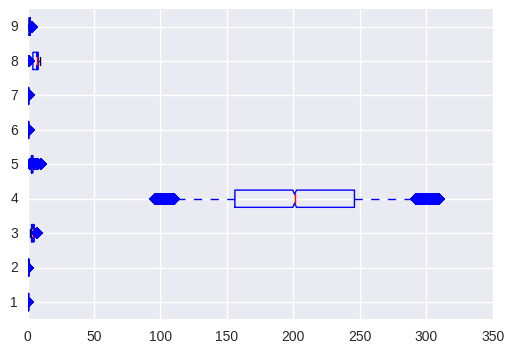

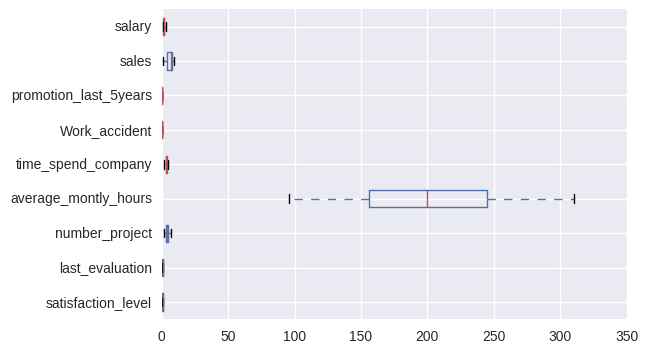

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Compare - Pre and Post Standard Scaler Numpy Arrays 
plt.figure()
#plt.boxplot(X_train, 1,vert=False)
#plt.boxplot(X_train, 2,'gD',0)
plt.boxplot(X_train, 2,'gD',0,0.5)
plt.show()
# Dataset boxplot for Means and Variances 
dfh2.plot(kind='box', vert=False)

# Seen below - Features have very disparate Means and Variances - data set needs standardization and scaling 
# If we dont SCALE data we will see Average_Monthly_Hours will dominate the analysis. 
# Source:- http://matplotlib.org/examples/pylab_examples/boxplot_demo.html

In [84]:
# Classifier -1 [NO FEATURE SCALING - yet] 
# Source --  http://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes
# Gaussian Naive bayes -GaussianNB as 1st Classifier without any Feature Scaling 

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_train) # Chained FIT and PRED
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))


Number of mislabeled points out of a total 10499 points : 2108


# Cells below with Scaler and STD Scaler data - those are not Best options as regards ACCURACY scores - but we can not classify with Non Scaled Data as the Categorical Features we have are all having Diff Scales. Thus with this data set Naive Bayes is not a Good Choice of Classifier . 

#### random_state=123 --- Number of mislabeled points out of a total 10499 points : 2108 = 20.078%

#### Instantiated - Multinomial Naive Bayes - but didnt Fit or Predict as MNB cant be used with Negative Values of X_train it throws an error with scaled data. Error as seen below :-  

/home/dhankar/anaconda2/lib/python2.7/site-packages/sklearn/naive_bayes.pyc in _count(self, X, Y)
    688         """Count and smooth feature occurrences."""
    689         if np.any((X.data if issparse(X) else X) < 0):
--> 690             raise ValueError("Input X must be non-negative")
    691         self.feature_count_ += safe_sparse_dot(Y.T, X)
    692         self.class_count_ += Y.sum(axis=0)

ValueError: Input X must be non-negative


### Source - http://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification
### Source - http://stackoverflow.com/questions/16123572/k-fold-cross-validation-for-naive-bayes-classifier

In [85]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train using X_train_scaled
%time nb.fit(X_train, y_train)


CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 52.9 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### How is STANDARD SCALER different from SCALER ??

  On the STANDARD SCALER  official documentation page - Scaler is mentioned as - "Equivalent function without the  object oriented API." But as seen in this notebook - data pre-processed with STANDARD SCALER provides a higher Accuracy Score upon model evaluation. 

- Other Scalers given - required / not required ?? MIN MAX SCaler Not required. 
- Docs for Scaler state dont Scale the Target Feature - BUT - MLP - Neural Net requires this ?? 

     Cells below - 1st RUN - Scale X_train ,X_test , y_train and y_test. 
     2nd RUN - STANDARD SCALER X_train ,X_test , y_train and y_test. 



In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
#
X_train_scaled = preprocessing.scale(X_train)
print (X_train_scaled.shape) 
print (type(X_train_scaled))
print ("_"*90)
y_train_scaled = preprocessing.scale(y_train)
print (y_train_scaled.shape) 
print (type(y_train_scaled))
print ("_"*90)
#print X_train_scaled # Ok Not required 
print ("_"*90)
print (X_train_scaled.mean(axis=0)) # Means Exponential e-16 or e-17, Why not ZERO's ? format the Floating Points 
print ("_"*90)
print (X_train_scaled.std(axis=0))
print ("_"*90)
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(X_train_scaled[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.8f}'.format(X_train_scaled[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,5].mean()))
print('Feature == 6 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,6].mean()))
print('Feature == 7 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,7].mean()))
print('Feature == 8 -- Mean after Rescaling = {:.8f}'.format(X_train_scaled[:,8].mean()))
#
print("_________________y-train-scaled______________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(y_train_scaled.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(y_train_scaled.std()))
print ("_"*90)
X_test_scaled = preprocessing.scale(X_test)
print(X_test_scaled.shape) 
#print type(X_test_scaled)
y_test_scaled = preprocessing.scale(y_test)
print(y_test_scaled.shape) 
#print type(y_test_scaled)
print ("_"*90)

#print X_test_scaled # Ok Not required 
#print "_________________________________"
#print X_test_scaled.mean(axis=0) # 
#print "_________________________________"
#print X_test_scaled.std(axis=0)
print("________________X-Test-Scaled_______________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(X_test_scaled[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.8f}'.format(X_test_scaled[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_test_scaled[:,5].mean()))
print("________________y-Test-Scaled_______________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.8f}'.format(y_test_scaled.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.8f}'.format(y_test_scaled.std()))


# Need to check - why -0.0000 values for Mean on Rescaling and do these impact the Predictions ? 

(10499, 9)
<class 'numpy.ndarray'>
__________________________________________________________________________________________
(10499,)
<class 'numpy.ndarray'>
__________________________________________________________________________________________
__________________________________________________________________________________________
[  3.05576859e-14   3.06446511e-14   1.43052644e-16   1.37363531e-16
   1.07116060e-15   2.25576508e-16  -3.39184290e-16   1.34783338e-16
   4.12545298e-16]
__________________________________________________________________________________________
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
__________________________________________________________________________________________
Feature == 0 -- Mean after Rescaling = 0.00000000
Feature == 0 -- Variance after Rescaling = 1.00000000
Feature == 1 -- Mean after Rescaling = 0.00000000
Feature == 1 -- Variance after Rescaling = 1.00000000
Feature == 2 -- Mean after Rescaling = 0.00000000
Feature == 3 -- Mean aft

/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [14]:
# Standardizing and Rescaling - 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

sc1 = StandardScaler()
sc1.fit(y_train)

#sc = preprocessing.StandardScaler().fit(X_train) # single line option chained code 

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)    ###Note --- Why not do a sc.fit(X_test) ? 
y_train_sc1 = sc1.transform(y_train)
y_test_sc1 = sc1.transform(y_test) 

# The means and STD values for X_test arent same as above with SCALER ? 

print(X_train_sc.shape) 
print(type(X_train_sc))
print ("_"*90)
#print X_test_scaled # Ok Not required 
print ("_"*90)
print(X_train_sc.mean(axis=0)) # 
print ("_"*90)
print(X_train_sc.std(axis=0))
print("________________X-Train-sc_______________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(X_train_sc[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(X_train_sc[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.4f}'.format(X_train_sc[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.4f}'.format(X_train_sc[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_train_sc[:,5].mean()))
print("________________y-Train-sc_______________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(y_train_sc1.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(y_train_sc1.std()))

print(X_test_sc.shape) 
print(type(X_test_sc))
print ("_"*90)
#print X_test_scaled # Ok Not required 
print ("_"*90)
print(X_test_sc.mean(axis=0)) # 
print ("_"*90)
print(X_test_sc.std(axis=0))
print("_____________X-Test-sc__________________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(X_test_sc[:,0].mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(X_test_sc[:,0].std()))
print('Feature == 1 -- Mean after Rescaling = {:.4f}'.format(X_test_sc[:,1].mean()))
print('Feature == 1 -- Variance after Rescaling = {:.4f}'.format(X_test_sc[:,1].std()))
print('Feature == 2 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,2].mean()))
print('Feature == 3 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,3].mean()))
print('Feature == 4 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,4].mean()))
print('Feature == 5 -- Mean after Rescaling = {:.8f}'.format(X_test_sc[:,5].mean()))
print("____________y-Test-sc___________________________________________________________________")
print('Feature == 0 -- Mean after Rescaling = {:.4f}'.format(y_test_sc1.mean()))
print('Feature == 0 -- Variance after Rescaling = {:.4f}'.format(y_test_sc1.std()))


(10499, 9)
<class 'numpy.ndarray'>
__________________________________________________________________________________________
__________________________________________________________________________________________
[  3.05576859e-14   3.06446511e-14   1.43052644e-16   1.37363531e-16
   1.07116060e-15   2.25576508e-16  -3.39184290e-16   1.34783338e-16
   4.12545298e-16]
__________________________________________________________________________________________
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
________________X-Train-sc_______________________________________________________________
Feature == 0 -- Mean after Rescaling = 0.0000
Feature == 0 -- Variance after Rescaling = 1.0000
Feature == 1 -- Mean after Rescaling = 0.0000
Feature == 1 -- Variance after Rescaling = 1.0000
Feature == 2 -- Mean after Rescaling = 0.00000000
Feature == 3 -- Mean after Rescaling = 0.00000000
Feature == 4 -- Mean after Rescaling = 0.00000000
Feature == 5 -- Mean after Rescaling = -0.00000000
______________

/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/dhankar/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, Depre

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#clf.fit(X_train_sc, y_test_sc1)                         

MLPC = MLPClassifier(random_state=2)

MLPC.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [89]:
scores = cross_val_score(MLPC,X_test,y_test,cv=5,scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.76 (+/- 0.03)


# Neural Network - Multi-layer Perceptron (MLP)
#### The disadvantages of Multi-layer Perceptron (MLP) include:
 - MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
 - MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers,and iterations. 
 - MLP is sensitive to feature scaling.


Scaling Data - Train and Test sets both for MLP - Multi-layer Perceptron is sensitive to feature scaling, 
so it is highly recommended to scale your data. For example, scale each attribute on the input 
vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply
the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.


In [15]:
# 1st RUN - KNN - with X_train_scaled and y_train 
# 2nd RUN - KNN - with X_train_sc and y_train 
#

from sklearn.neighbors import KNeighborsClassifier

# Instantiate kNN model with 1 Neighbour 
knn = KNeighborsClassifier(n_neighbors=1)

# Fit kNN model with Train data (occurs in-place)
#knn.fit(X_train_scaled, y_train)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
# 1st RUN - predict kNN Class with with X_test_scaled
# 2nd RUN - predict kNN Class with with X_test_sc

#y_pred_class_kNN = knn.predict(X_test_scaled)
y_pred_class_kNN = knn.predict(X_test_sc)

y_pred_class_kNN.shape

(4500,)

In [17]:
from sklearn import metrics

print(type(y_pred_class_kNN))
print(len(y_pred_class_kNN))
print ("_"*90)
print(len(y_test))
print('Logistic Reg Model predicted classes: {}'.format(y_pred_class_kNN))
print('Actual data - Real classes: {}'.format(y_test))
print ("_"*90)
print(metrics.accuracy_score(y_test, y_pred_class_kNN))
print("_____Model Evaluation with AUC Area Under the Curve __________________")
print(metrics.roc_auc_score(y_test, y_pred_class_kNN))
#
print(metrics.classification_report(y_test, y_pred_class_kNN))


<class 'numpy.ndarray'>
4500
__________________________________________________________________________________________
4500
Logistic Reg Model predicted classes: [1 0 0 ..., 0 0 1]
Actual data - Real classes: [1 0 0 ..., 0 0 1]
__________________________________________________________________________________________
0.967555555556
_____Model Evaluation with AUC Area Under the Curve __________________
0.966511538999
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      3429
          1       0.91      0.96      0.93      1071

avg / total       0.97      0.97      0.97      4500



### MODEL EVALUATION :- Accuracy Score of kNN - ROC and AUC 


Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality 
using cross-validation.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. 
This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, 
and a true positive rate of one. This is not very realistic, but it does mean that a larger area under 
the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate 
while minimizing the false positive rate.

### Calculated earlier = 1-dfh["left"].mean() = 76% 

#### Random_State Seed Value = 123  :- 
Accuracy Score = 0.967555555556 = 96.75%
AUC-Area Under the Curve Score = 0.966511538999 = 96.65%

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      3429
          1       0.91      0.96      0.93      1071

avg / total       0.97      0.97      0.97      4500



In [18]:
# TREE Classifier using "Raw data" - which is neither Scaled or Standardized
#

from sklearn import tree


clf = tree.DecisionTreeClassifier(max_depth=10, criterion='entropy') # max_features= TBD , criterion= ('entropy','gini') 
clf = clf.fit(X_train,y_train)
         

In [19]:
with open("HrA_3.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [20]:
'''
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("HrA_2.pdf")

# Need not be run - running code in cell below with - feature_names = names, where names are the LABELS
'''

True

In [21]:
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = names,  
                         #class_names= names1,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

graph.write_pdf("HrA_3.pdf")

True